# Practical: Bulk Modulus
## Introdction
Bulk modulus is a measure of how resistant a material is to compression. It is defined as the ratio of the infinitesimal pressure increase to the resulting relative decrease of the volume.

$$K = -V \frac{dP}{dV} = V \frac{d^2E}{dV^2}$$

where $K$ is the bulk modulus, $V$ is the volume, $P$ is the pressure, and $E$ is the total energy.

## Relationship Between Bulk Modulus and Density
Like Young's modulus, typically, the bulk modulus of a material is positively related to its density. For example, gases have low bulk moduli and low density because they are easily compressed, while solids have high bulk moduli with higher density because they are more difficult to compress. This is because the bulk modulus is a measure of how resistant a material is to compression, and denser materials are generally more resistant to compression. 

## VRH, Reuss, and Hill Averages
There are different ways to measure the bulk modulus. The Voigt average assumes that the strain is uniform throughout the material, which tends to overestimate the bulk modulus. The Reuss average assumes that the stress is uniform throughout the material, which tends to underestimate the bulk modulus. The Hill average, being the arithmetic mean of the Voigt and Reuss averages, provides a more accurate estimate of the bulk modulus by balancing these two extremes.

The Voigt-Reuss-Hill (VRH) average is a method for calculating the bulk modulus of a composite material. The VRH average is the arithmetic mean of the Voigt and Reuss bounds, which are upper and lower bounds on the bulk modulus of a composite material. The Hill average is a weighted average of the Voigt and Reuss bounds, with the weights determined by the volume fractions of the phases in the composite material. We will use the VRH average to calculate the bulk modulus of a material in this practical.

In Materials Project, the bulk modulus data is returned as a dictionary (`bulk_modulus`) with the following keys:
- `vrh`: The VRH average of the bulk modulus. Average of `reuss` and `voigt`.
- `reuss`: The Reuss average of the bulk modulus. `reuss` is the lower bound of the bulk modulus.
- `voigt`: The Voigt average of the bulk modulus. `voigt` is the upper bound of the bulk modulus.

In [ ]:
# you can skip this if you've already installed the mp_api package.
!pip install mp_api

In [1]:
MP_API_KEY = "WrdzUerIW5RHiXiXNSPm3sHeM4JN8BGV" # You can get your API key at https://next-gen.materialsproject.org/dashboard

from mp_api.client import MPRester

# Pass your API key directly as an argument.
with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        fields=["material_id", "volume","density", "bulk_modulus", "shear_modulus"], is_stable=True, k_vrh=[0.01, 1000]
    )

Retrieving SummaryDoc documents:   0%|          | 0/5161 [00:00<?, ?it/s]

In [2]:
# dump results to a json file
import json
with open('materials_data2.json', 'w') as f:
    json.dump([doc.dict() for doc in docs], f, indent=4)

We can then load the saved data and construct a `DataFrame` for easier manipulation.

In [3]:
import pandas as pd

# load results from a json file as pandas dataframe
df = pd.read_json('materials_data2.json')[['material_id', 'volume', 'density', 'bulk_modulus', 'shear_modulus']]
print(df)

     material_id      volume    density  \
0      mp-861724  110.157369  11.367264   
1      mp-862319  135.917612   8.370293   
2      mp-862786  113.979079   8.598305   
3      mp-861883  104.095515  11.322190   
4      mp-865470  126.204675   8.371544   
...          ...         ...        ...   
5156     mp-2979  182.235382   6.052680   
5157     mp-4524  158.907389   4.179819   
5158      mp-429   46.275258   8.906569   
5159    mp-11621   50.980115   8.008301   
5160    mp-11025  470.143187   3.598571   

                                           bulk_modulus  \
0     {'voigt': 67.493, 'reuss': 67.493, 'vrh': 67.493}   
1     {'voigt': 42.615, 'reuss': 42.615, 'vrh': 42.615}   
2     {'voigt': 54.864, 'reuss': 54.864, 'vrh': 54.864}   
3     {'voigt': 68.935, 'reuss': 68.935, 'vrh': 68.935}   
4     {'voigt': 46.296, 'reuss': 46.296, 'vrh': 46.296}   
...                                                 ...   
5156  {'voigt': 161.892, 'reuss': 161.782, 'vrh': 16...   
5157   {'vo

Trend line: y = 10.87 * x^1.03


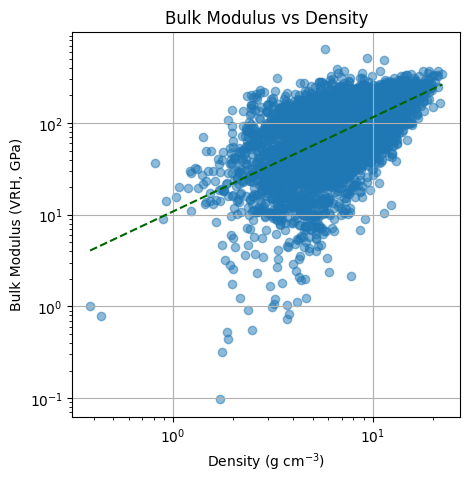

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Extract 'vrh' values from 'bulk_modulus' dictionaries
df['bulk_modulus_vrh'] = df['bulk_modulus'].apply(lambda x: x['vrh'])
df['shear_modulus_vrh'] = df['shear_modulus'].apply(lambda x: x['vrh'])

# Plot bulk modulus vs density
plt.figure(figsize=(5, 5))

plt.title('Bulk Modulus vs Density')
plt.xlabel('Density (g cm$^{-3}$)')
plt.ylabel('Bulk Modulus (VRH, GPa)')
plt.grid(True)

# Fit linear trend line in log-log space
log_density = np.log(df['density'])
log_bulk_modulus = np.log(df['bulk_modulus_vrh'])

# Fit linear trend line in log-log space
slope, intercept = np.polyfit(log_density, log_bulk_modulus, 1)

# Plot trend line
x = np.linspace(df['density'].min(), df['density'].max(), 100)
plt.plot(x, np.exp(intercept) * x**slope, color='darkgreen', linestyle='--')
print(f'Trend line: y = {np.exp(intercept):.2f} * x^{slope:.2f}')
# Plot filtered data
plt.scatter(df['density'], df['bulk_modulus_vrh'], alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.show()


In [5]:
print(f"K = {slope:.2f} * density * exp({intercept:.2f})")

print(f"Cu: prediction = {slope*8.96*np.exp(intercept):.1f} GPa and experimental value 140 GPa")
print(f"Fe: prediction = {slope*7.87*np.exp(intercept):.1f} GPa and experimental value 170 GPa")
print(f"Ag: prediction = {slope*10.49*np.exp(intercept):.1f} GPa and experimental value 100 GPa")
print(f"Al: prediction = {slope*2.67*np.exp(intercept):.1f} GPa and experimental value 76 GPa")



K = 1.03 * density * exp(2.39)
Cu: prediction = 100.0 GPa and experimental value 140 GPa
Fe: prediction = 87.9 GPa and experimental value 170 GPa
Ag: prediction = 117.1 GPa and experimental value 100 GPa
Al: prediction = 29.8 GPa and experimental value 76 GPa


## Visualize the Distribution of Bulk Modulus and Density


Bar plots 

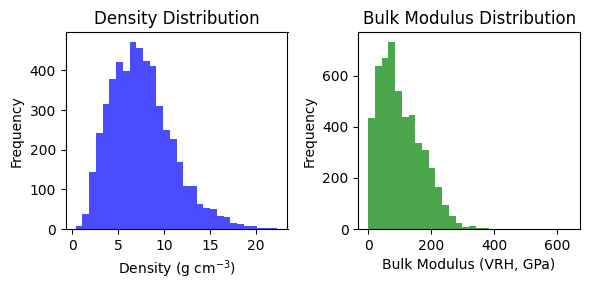

In [6]:
# Plot distribution of density
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.hist(df['density'], bins=30, color='blue', alpha=0.7)
plt.title('Density Distribution')
plt.xlabel('Density (g cm$^{-3}$)')
plt.ylabel('Frequency')

# Plot distribution of bulk modulus
plt.subplot(1, 2, 2)
plt.hist(df['bulk_modulus_vrh'], bins=30, color='green', alpha=0.7)
plt.title('Bulk Modulus Distribution')
plt.xlabel('Bulk Modulus (VRH, GPa)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

We can also use `seaborn` to visualize the distribution of bulk modulus and density using the `joint plot`.

In [7]:
!pip install seaborn

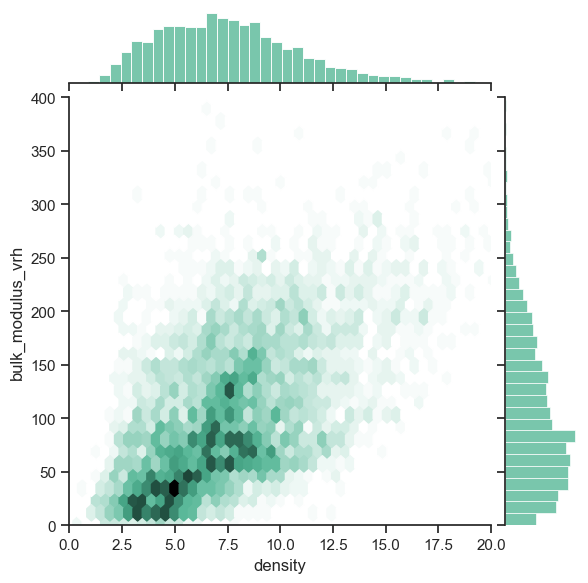

In [8]:
import seaborn as sns

# visualize above code using joint hexbin plot from seaborn
# Create a joint hexbin plot
sns.set_theme(style="ticks")

plot = sns.jointplot(x='density', y='bulk_modulus_vrh', data=df, kind='hex', gridsize=50, color="#4CB391")
plot.ax_marg_x.set_xlim(0, 20)
plot.ax_marg_y.set_ylim(0, 400)

plt.show()

## Bulk Modulus of Oxides and Sulfides
Usually oxides are stiff and have high bulk modulus, while sulfides are soft and have low bulk modulus. We can check this trend by plotting the bulk modulus of oxides and sulfides.


In [9]:
with MPRester(MP_API_KEY) as mpr:
    docs_oxide = mpr.materials.summary.search(
        fields=["material_id", "density", "bulk_modulus"], is_stable=True, elements=[ "O"], k_vrh=[0.01, 1000]
    )

with MPRester(MP_API_KEY) as mpr:
    docs_sulfide = mpr.materials.summary.search(
        fields=["material_id", "density", "bulk_modulus"], is_stable=True, elements=[ "S"], k_vrh=[0.01, 1000]
    )

with open('materials_data_oxides.json', 'w') as f:
    json.dump([doc.dict() for doc in docs_oxide], f, indent=4)

with open('materials_data_sulfides.json', 'w') as f:
    json.dump([doc.dict() for doc in docs_sulfide], f, indent=4)

Retrieving SummaryDoc documents:   0%|          | 0/606 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/254 [00:00<?, ?it/s]

In [10]:
# load results from a json file as pandas dataframe and then plot the data with two different colors
with open('materials_data_oxides.json', 'r') as f:
    data = json.load(f)

df_O = pd.DataFrame(data)[['material_id', 'volume', 'density', 'bulk_modulus']]

with open('materials_data_sulfides.json', 'r') as f:
    data = json.load(f)

df_S = pd.DataFrame(data)[['material_id', 'volume', 'density', 'bulk_modulus']]


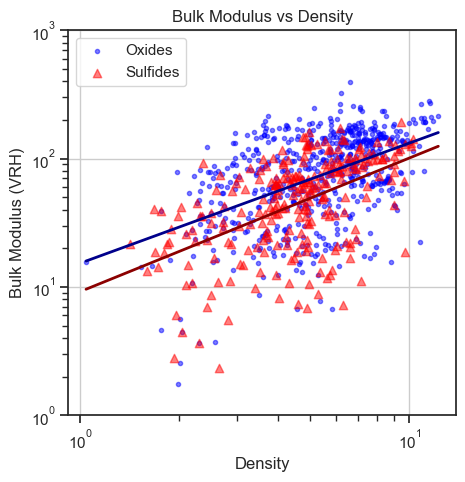

In [11]:
import numpy as np

#  plot the data with two different colors
# Extract 'vrh' values from 'bulk_modulus' dictionaries for oxides and sulfides
df_O['bulk_modulus_vrh'] = df_O['bulk_modulus'].apply(lambda x: x['vrh'])
df_S['bulk_modulus_vrh'] = df_S['bulk_modulus'].apply(lambda x: x['vrh'])

# Plot bulk modulus vs density for oxides and sulfides
plt.figure(figsize=(5, 5))

plt.scatter(df_O['density'], df_O['bulk_modulus_vrh'], color='blue', label='Oxides',marker='.', alpha=0.5)
plt.scatter(df_S['density'], df_S['bulk_modulus_vrh'], color='red', label='Sulfides',marker='^', alpha=0.5)

# Fit linear trend lines in log-log space
log_density_O = np.log(df_O['density'])
log_bulk_modulus_O = np.log(df_O['bulk_modulus_vrh'])
log_density_S = np.log(df_S['density'])
log_bulk_modulus_S = np.log(df_S['bulk_modulus_vrh'])

slope_O, intercept_O = np.polyfit(log_density_O, log_bulk_modulus_O, 1)
slope_S, intercept_S = np.polyfit(log_density_S, log_bulk_modulus_S, 1)

# Plot trend lines
x = np.linspace(df_O['density'].min(), df_O['density'].max(), 100)
plt.plot(x, np.exp(intercept_O) * x**slope_O, color='darkblue', linestyle='-', linewidth=2)
plt.plot(x, np.exp(intercept_S) * x**slope_S, color='darkred', linestyle='-', linewidth=2)

plt.title('Bulk Modulus vs Density')
plt.xlabel('Density')
plt.ylabel('Bulk Modulus (VRH)')
plt.legend()
plt.grid(True)
plt.ylim(1, 1e3)
plt.xscale('log')
plt.yscale('log')
plt.show()


In [12]:
with MPRester(MP_API_KEY) as mpr:
    docs_chloride = mpr.materials.summary.search(
        fields=["material_id", "density", "bulk_modulus"], is_stable=True, elements=[ "Cl"], k_vrh=[0.01, 1000]
    )

with MPRester(MP_API_KEY) as mpr:
    docs_bromide = mpr.materials.summary.search(
        fields=["material_id", "density", "bulk_modulus"], is_stable=True, elements=[ "Br"], k_vrh=[0.01, 1000]
    )

with MPRester(MP_API_KEY) as mpr:
    docs_iodide = mpr.materials.summary.search(
        fields=["material_id", "density", "bulk_modulus"], is_stable=True, elements=[ "I"], k_vrh=[0.01, 1000]
    )

with open('materials_data_chloride.json', 'w') as f:
    json.dump([doc.dict() for doc in docs_chloride], f, indent=4)

with open('materials_data_bromide.json', 'w') as f:
    json.dump([doc.dict() for doc in docs_bromide], f, indent=4)

with open('materials_data_iodide.json', 'w') as f:
    json.dump([doc.dict() for doc in docs_iodide], f, indent=4)

Retrieving SummaryDoc documents:   0%|          | 0/136 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/92 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/77 [00:00<?, ?it/s]

In [14]:
# load results from a json file as pandas dataframe and then plot the data with two different colors
with open('materials_data_chloride.json', 'r') as f:
    data = json.load(f)

df_Cl = pd.DataFrame(data)[['material_id', 'volume', 'density', 'bulk_modulus']]

with open('materials_data_bromide.json', 'r') as f:
    data = json.load(f)

df_Br = pd.DataFrame(data)[['material_id', 'volume', 'density', 'bulk_modulus']]


with open('materials_data_iodide.json', 'r') as f:
    data = json.load(f)

df_I = pd.DataFrame(data)[['material_id', 'volume', 'density', 'bulk_modulus']]

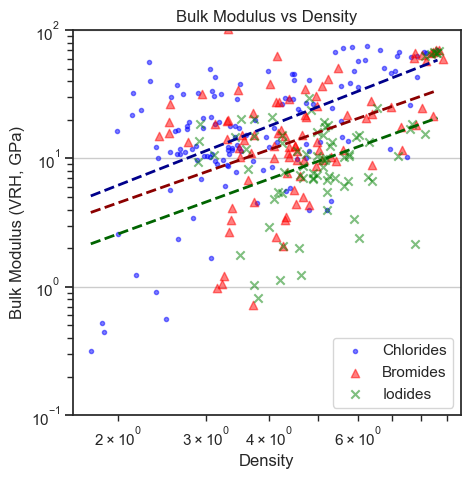

In [15]:
import numpy as np

#  plot the data with two different colors
# Extract 'vrh' values from 'bulk_modulus' dictionaries for oxides and sulfides
df_Cl['bulk_modulus_vrh'] = df_Cl['bulk_modulus'].apply(lambda x: x['vrh'] if isinstance(x, dict) else None)
df_Br['bulk_modulus_vrh'] = df_Br['bulk_modulus'].apply(lambda x: x['vrh'] if isinstance(x, dict) else None)
df_I['bulk_modulus_vrh'] = df_I['bulk_modulus'].apply(lambda x: x['vrh'] if isinstance(x, dict) else None)

# Plot bulk modulus vs density for oxides and sulfides
plt.figure(figsize=(5, 5))

# Fit linear trend lines in log-log space
log_density_Cl = np.log(df_Cl['density'])
log_bulk_modulus_Cl = np.log(df_Cl['bulk_modulus_vrh'])
log_density_Br = np.log(df_Br['density'])
log_bulk_modulus_Br = np.log(df_Br['bulk_modulus_vrh'])
log_density_I = np.log(df_I['density'])
log_bulk_modulus_I = np.log(df_I['bulk_modulus_vrh'])

slope_Cl, intercept_Cl = np.polyfit(log_density_Cl, log_bulk_modulus_Cl, 1)
slope_Br, intercept_Br = np.polyfit(log_density_Br, log_bulk_modulus_Br, 1)
slope_I, intercept_I = np.polyfit(log_density_I, log_bulk_modulus_I, 1)

# Plot trend lines
x = np.linspace(df_Cl['density'].min(), df_Cl['density'].max(), 100)
plt.scatter(df_Cl['density'], df_Cl['bulk_modulus_vrh'], color='blue', label='Chlorides', marker='.', alpha=0.5)
plt.scatter(df_Br['density'], df_Br['bulk_modulus_vrh'], color='red', label='Bromides', marker='^', alpha=0.5)
plt.scatter(df_I['density'], df_I['bulk_modulus_vrh'], color='green', label='Iodides', marker='x', alpha=0.5)
plt.plot(x, np.exp(intercept_Cl) * x**slope_Cl, color='darkblue', linestyle='--', linewidth=2)
plt.plot(x, np.exp(intercept_Br) * x**slope_Br, color='darkred', linestyle='--', linewidth=2)
plt.plot(x, np.exp(intercept_I) * x**slope_I, color='darkgreen', linestyle='--', linewidth=2)

plt.title('Bulk Modulus vs Density')
plt.xlabel('Density')
plt.ylabel('Bulk Modulus (VRH, GPa)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-1, 1e2)

plt.show()


```{admonition} Summary
:class: info
From simple linear regression, we can see that the bulk modulus is generally positively related to the density of the material. 
- The bulk modulus of oxides is usually higher than that of sulfides.
- The bulk modulus of chloride is larger than bromide and iodide.

However, such trends are not always true because the bulk modulus is also affected by other factors such as the structure of the material and the bonding between atoms.
```